In [1]:
%matplotlib inline

In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

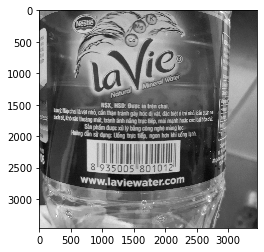

In [2]:
image = cv2.imread("05.jpg", 0)
image_out = cv2.imread("05.jpg")
plt.imshow(image, cmap='gray')

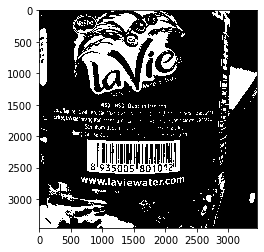

In [3]:
#thresholding
ret, thresh = cv2.threshold(image, 170, 255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

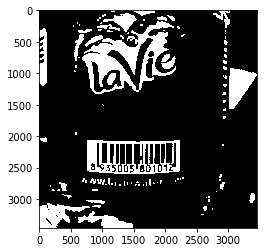

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
#remove some noise
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

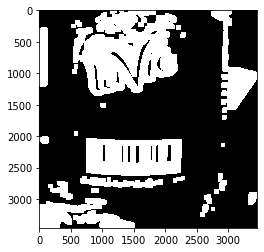

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
dilation = cv2.dilate(opening, kernel)
plt.imshow(dilation, cmap='gray')

In [6]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,connectivity=8)


In [7]:
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

59
1362
1627
126
83
962
97
160
80
92
87
128
597
74
336
117
181
161
307
86
211
147
471
202
69


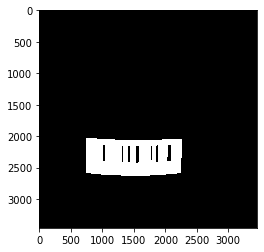

In [8]:
mask = np.zeros_like(dilation, dtype=np.uint8)
mask[labels==13] = 255
plt.imshow(mask, cmap='gray')

In [9]:
# find the contours in the thresholded image
(cnts, _) = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# otherwise, sort the contours by area and compute the rotated
# bounding box of the largest contour
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))



In [10]:
cv2.drawContours(image_out, [box], -1, (0, 255, 0), 3)

array([[[122, 128, 111],
        [123, 129, 112],
        [128, 133, 118],
        ...,
        [ 43,  51,  64],
        [ 44,  52,  65],
        [ 44,  52,  65]],

       [[128, 134, 117],
        [128, 134, 117],
        [129, 134, 119],
        ...,
        [ 44,  52,  65],
        [ 44,  52,  65],
        [ 44,  52,  65]],

       [[131, 137, 120],
        [132, 138, 121],
        [132, 137, 122],
        ...,
        [ 46,  54,  67],
        [ 47,  55,  68],
        [ 47,  55,  68]],

       ...,

       [[197, 216, 253],
        [197, 216, 253],
        [196, 215, 252],
        ...,
        [ 31,  40,  60],
        [ 32,  41,  61],
        [ 33,  42,  62]],

       [[195, 214, 251],
        [196, 215, 252],
        [196, 215, 252],
        ...,
        [ 32,  41,  61],
        [ 34,  44,  62],
        [ 34,  44,  62]],

       [[190, 209, 246],
        [192, 211, 248],
        [193, 212, 249],
        ...,
        [ 32,  41,  61],
        [ 35,  45,  63],
        [ 36,  46,  64]]

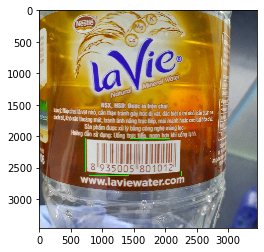

In [11]:
plt.imshow(image_out)


In [12]:
cv2.imwrite('out05.jpg', image_out)

True